![TUM Physik logo](content/tumphysik.png)
## Übungen zur Experimentalphysik 1
### Blatt 1
Author: Philipp Gadow (philipp@pgadow.de)

In [1]:
# Vorbereitung: importiere python packages
import math
import numpy as np
import sympy
from sympy import symbols, simplify, factor, I
from sympy.physics.mechanics import ReferenceFrame
import matplotlib.pyplot as plt
from ipywidgets import interact
%matplotlib inline

### Aufgabe 1
a) Sie haben in der Vorlesung das [Sekundenpendel](https://de.wikipedia.org/wiki/Sekundenpendel) gesehen (l = 0,994m, m = 300g) und beschließen ein Sekundenpendel (eine halbe Periode entspricht einer Sekunde) auf dem Mond zu bauen. Wie muss dieses Pendel beschaffen sein?

**Antwort**: Das Pendel muss kürzer sein, da die Rückstellkraft, die auf das Pendel wegen der verringerten Anziehung auf dem Mond wirkt, geringer ist. Um wie viel kürzer das Pendel sein muss, werden wir jetzt berechnen:
Es gilt für die Schwingungsdauer eines Fadenpendels $T = 2 \pi \sqrt{\frac{l}{g}}$, wobei $l$ die Fadenlänge und $g$ die Schwerebeschleunigung, die auf der Erde $g = G\frac{M_{\text{Erde}}}{R_{\text{Erde}}^2} = 9.81 \text{m}\text{s}^{-2}$ beträgt und sich aus Gravitationskonstante $G$, Erdradius $R_{\text{Erde}}$ und Erdmasse $m_{\text{Erde}}$ zusammensetzt.
Die Schwerebeschleunigung auf dem Mond beträgt $g_{\text{Mond}} = G\frac{M_{\text{Mond}}}{R_{\text{Mond}}^2}$.
Somit können wir die Länge des Seils mit der geforderten Schwingungsdauer von $2\,\text{s}$ (hin und zurück) berechnen.

In [2]:
# Definiere Konstanten und Größen
G = 6.67408 * 10**(-11) # in m**3 kg**(-1) s**(-2)
m_earth = 5.972 * 10**24 # in kg
r_earth = 6371000 # in m
m_moon = 7.348 * 10**22 # in kg
r_moon = 1737000 # in m

# Berechne Schwerebeschleunigungen
g_earth = G * m_earth / (r_earth**2)
g_moon  = G * m_moon / (r_moon**2)

print('Schwerebeschleuningung der Erde: {:.2f} m/s^(-2)'.format(g_earth)) # mehr Informationen zu format:
print('Schwerebeschleuningung des Monds: {:.2f} m/s^(-2)'.format(g_moon)) # http://pyformat.info

# Berechne Pendellängen
def length(T,g):
    return (T**2 * g)/((2. * math.pi)**2)
                     
l_earth = length(2., g_earth)
l_moon = length(2., g_moon)
print('Länge Sekundenpendel auf der Erde: {:.2f} m'.format(l_earth))
print('Länge Sekundenpendel auf dem Mond: {:.2f} m'.format(l_moon))

Schwerebeschleuningung der Erde: 9.82 m/s^(-2)
Schwerebeschleuningung des Monds: 1.63 m/s^(-2)
Länge Sekundenpendel auf der Erde: 0.99 m
Länge Sekundenpendel auf dem Mond: 0.16 m


b) Beflügelt von ihrem Erfolg wollen sie das Gleiche auf dem Mars machen. Da der Marstag
nur um 41 Minuten länger ist als ein Erdtag wollen Sie nicht innerlich die ganze Zeit
umrechnen und bauen ihr Pendel so, dass es Marssekunden anzeigen soll (ein $\frac{1}{24\cdot60\cdot60}$)-tel
eines Marstages).

**Antwort**: Wir berechnen den Faktor, um wie viel eine Marssekunde länger ist als eine Erdsekunde.
Dann müssen wir noch die Schwerebeschleunigung auf dem Mars berechnen und können dann wie vorher die Fadenlänge berechnen.

In [3]:
# Berechne Faktor, um wie viel Marssekunde länger ist als Erdsekunde
a = (24*60 + 41)/(24*60)
print('Faktor m_mars/m_erde: {:.2f}'.format(a))


# Definiere Konstanten und Größen
G = 6.67408 * 10**(-11) # in m**3 kg**(-1) s**(-2)
m_mars = 6.39 * 10**23  # in kg
r_mars = 3390000 # in m

# Berechne Schwerebeschleunigungen
g_mars  = G * m_mars / (r_mars**2)

print('Schwerebeschleuningung des Mars: {:.2f} m/s^(-2)'.format(g_mars))

# Berechne Pendellänge
l_mars = a * length(2., g_mars)
print('Länge Marssekundenpendel auf der Mars: {:.2f} m'.format(l_mars))


Faktor m_mars/m_erde: 1.03
Schwerebeschleuningung des Mars: 3.71 m/s^(-2)
Länge Marssekundenpendel auf der Mars: 0.39 m


c) Was zeigt ihr Marspendel zurück auf der Erde für eine Zeitspanne an?

**Antwort**: Wir setzen für eine Schwingung hin (also eine halbe Periode) die Länge des Pendels, die wir eben berechnet haben und die Schwerebeschleunigung auf der Erde ein. Für eine ganze Periode, also zwei Schwingungen ist die Lösung natürlich die doppelte Zeit.

In [4]:
T_2 = 1/2 *2 * math.pi * math.sqrt(l_mars / g_earth)
T = 2 * math.pi * math.sqrt(l_mars / g_earth)
print('Schwingungsdauer eine Schwingung {:.2f}'.format(T_2))
print('Periodendauer {:.2f}'.format(T))

Schwingungsdauer eine Schwingung 0.62
Periodendauer 1.25


### Aufgabe 2
Für die Altersbestimmung lebender Substanzen wird die sogenannte [$\text{C}^{14}$-Methode](https://de.wikipedia.org/wiki/Radiokarbonmethode) verwendet. Lebende Substanzen enthalten vom Isotop $\text{C}^{14}$ ein Atom auf $9.3 \cdot 10^{11}$ $\text{C}^{12}$-Atome. $\text{C}^{14}$ zerfällt mit einer [Halbwertszeit](https://de.wikipedia.org/wiki/Halbwertszeit) von ungefähr $5.5 \cdot 10^3$ Jahren. Bei der Verbrennung eines archäologischen Fundes wird $\text{C}\text{O}_{2}$ aufgefangen und aufbereitet zur Füllung eines Zählrohrs. Dabei geht kein Kohlenstoff verloren. Messungen ergeben, dass pro Minute $8.2$ $\text{C}^{14}$-Zerfälle im Zählrohr stattfinden. Wie alt ist das Fundstück? $\text{C}\text{O}_{2}$-Menge: $n = 0.071\,\text{mol}$ $\text{C}\text{O}_{2}$.

**Antwort**: Wir berechnen zuerst die Anzahl der $\text{C}^{12}$-Atome in dem Fundstück, indem wir die Anzahl der $\text{C}\text{O}_{2}$-Moleküle berechnen, in denen ja genau ein C-Atom vorhanden ist. Dann berechnen wir mit dem angegebenen Verhältnis die Anzahl der $\text{C}^{14}$ Atome damals im lebenden Zustand.

Die heute noch vorhandene Anzahl von $\text{C}^{14}$-Atomen ergibt sich nach dem Zerfallsgesetz, das wir als Differentialgleichung formulieren,
$$\frac{\text{d}N}{\text{d}t} = - \lambda N.$$
Die Lösung ist dieses Typs von Differentialgleichung ist eine Exponentialfunktion $N(t) = N_0 \exp{(-\lambda t)}$.

Die Zerfallskonstante lässt sich aus der Halbwertszeit $T_{1/2}$ berechnen als $\lambda = \frac{\ln{2}}{T_{1/2}}$.
Damit können wir nach dem Zerfallsgesetz das Alter des Fundstücks berechnen, da wir die Anzahl der $\text{C}^{14}$-Atome im lebenden Zustand kennen.

In [5]:
# Definiere Konstanten und Größen
N_A = 6.022140857e23 # in 1/mol, Avogadro-Konstante

# gesamte Menge CO2 in Fundstück
n_CO2 = 0.071 # in mol
N_CO2 = n_CO2 * N_A # Anzahl CO2-Moleküle = Anzahl C-Atome

# Anzahl der C14-Atome damals im lebenden Zustand
ratio_C14_to_C12 = 1. / 9.3e11
N0= N_CO2 * ratio_C14_to_C12

# Zerfallsgesetz
def decay(N0, decay_constant, t):
    return N0 * math.exp(-decay_constant * t)

# Berechne Zerfallskonstante aus Halbwertszeit
T_12 = 5.5e3 * 365.25 * 24 * 60**2 # in s
decay_constant = math.log(2) / T_12 # in 1/s

# berechne Anzahl der C14-Atome jetzt aus gemessener Zerfallsrate
decay_rate = 8.2 / 60 # Zerfälle pro Sekunde
N = decay_rate / decay_constant

print('Anzahl der C14-Atome heute: {:.2f}'.format(N))

# berechne Alter der Probe
t = math.log(N0 / N) / decay_constant # in s
t /= (365.25 * 24 * 60**2) # in y

print('Alter der Probe: {:.2f} Jahre'.format(t))

Anzahl der C14-Atome heute: 34221874755.14
Alter der Probe: 2342.70 Jahre


### Aufgabe 3

Benutzen Sie die [Dimensionsanalyse](https://de.wikipedia.org/wiki/Dimensionsanalyse#Beispiele), um zu ermitteln, inwiefern die Auftriebskraft pro Spannweitenlänge (siehe Abbildung) eines Flugzeugflügels mit Breite $L$ eine Funktion von $L$, der Fluggeschwindigkeit $v$ und der Luftdichte $\rho$ ist.

![Skizze Flugzeug](content/b1_a3_flugzeug.jpg)

**Antwort**: Dimensionsanalyse der beteiligten Größen

Beteiligte Parameter              | Notation                      | Größen            | Grundgrößen
--------------------------------- | ----------------------------  | ----------------- |----------------------
Auftriebskraft / Spannweitenlänge | $\frac{\text{d}F}{\text{d}s}$ | Kraft / Länge     | M / T$^2$
Flügelbreite                      | $ L $                         | Länge             | L
Fluggeschwindigkeit               | $ v $                         | Geschwindigkeit   | L / T
Luftdichte                        | $\rho$                        | Gewicht / Volumen | M / L$^3$

Wir machen den Ansatz, dass die Auftriebskraft pro Spannweitenlänge $\frac{\text{d}F}{\text{d}s}$ als Funktion $f$ der angegebenen Größen dargestellt werden kann:

$$\frac{\text{d}F}{\text{d}s} = f(L, v, \rho)$$


Dimensionsvektor von $\frac{\text{d}F}{\text{d}s}$ | Zugeordnete Dimensionsmatrix von $f$
--- | ---
$\begin{pmatrix} & \text{M} & \text{L} & \text{T} \\ \frac{\text{d}F}{\text{d}s} & 1 & 0 & -2 \end{pmatrix}$ | $\begin{pmatrix} & \text{M} & \text{L} & \text{T} \\ \rho & 1 & -3 & 0 \\ L & 0 & 1 & 0 \\ v & 0 & 1 & -1 \end{pmatrix}$

Nun müssen wir mit Linearkombinationen der Zeilen der rechten Matrix auf die Form des linken Zeilenvektors kommen.
Wir sehen sofort, dass unsere einzige Möglichkeit auf der linken Seite die Masse mit einer Potenz von eins vorkommen zu lassen ist, wenn die Dichte $\rho$ ebenfalls mit einer Potenz von eins in $f$ vorkommt.

Dadurch, dass $\rho$ in $f$ enthalten sein muss, haben wir neben dem gewünschten Faktor $\text{M}^1$ den Faktor $\text{L}^{-3}$ bekommen. Die Zielvorgabe ist aber, dass $f$ unabhängig von L ist.
Also müssen wir mit den verbleibenden Größen $L$ und $v$ eine geeignete Kombination finden, die uns die Faktoren von L beseitigt und zusätzlich noch den fehlenden Faktor $\text{T}^{-2}$ liefert.

Die einzige Möglichkeit, wie das geschehen kann, ist, wenn $v$ mit der Potenz zwei in $f$ vorkommt und $L$ mit der Potenz eins vorkommt.

Die Lösung ist somit
$$\frac{\text{d}F}{\text{d}s} = k \cdot \rho \cdot L \cdot v^2,$$
wobei $k \in \mathbb{R}$ eine dimensionslose Konstante ist.

### Aufgabe 4
Ein Radfahrer fährt mit einer konstanten Geschwindigkeit von 36 km/h. Zur Zeit $t_0$ springt die noch 150m entfernte Ampel auf Rot. 20 Sekunden später schaltet sie wieder auf Grün. Genau dann will der Radfahrer die Ampel passieren. Dazu bewegt er sich vom Moment $t_0$ an bis zum Passieren der Ampel mit der konstanten Beschleunigung $a_1$.

a) Wie groß ist $a_1$ und mit welcher Geschwindigkeit passiert der Radfahrer die Ampel?

In [6]:
# Definiere Größen
t0 = 0 # in s
t1 = 20 # in s
s0 = 0 # in s
s1 = 150 # in s
v0 = 36 * 1000/60**2  # in m/s

def v(t, a, v0):
    return a*t + v0
def s(t, a, v0, s0):
    return a/2.*t**2 + v0 *t + s0

a1 = 2.*(s1 - v0*t1 - s0)/t1**2
print('a1 = {:.2f} m/s^(-2)'.format(a1))

v1 = a1*t1 + v0
print('v1 = {:.2f} m/s'.format(v1))

a1 = -0.25 m/s^(-2)
v1 = 5.00 m/s


b) Zeichnen Sie die entsprechenden $v-t$ und $x-t$ Diagramme.

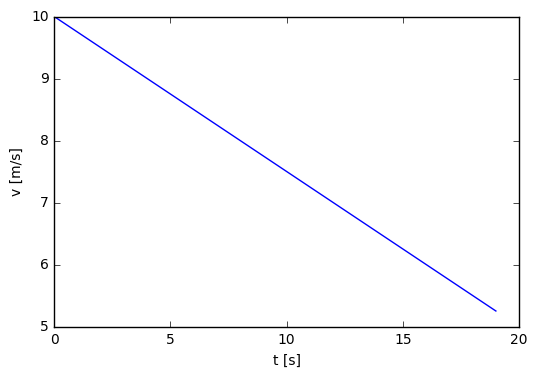

In [7]:
# v-t Diagramm
t = np.arange(t0, t1)
plt.plot(t, v(t,a1,v0))
plt.xlabel('t [s]')
plt.ylabel('v [m/s]')
plt.show()

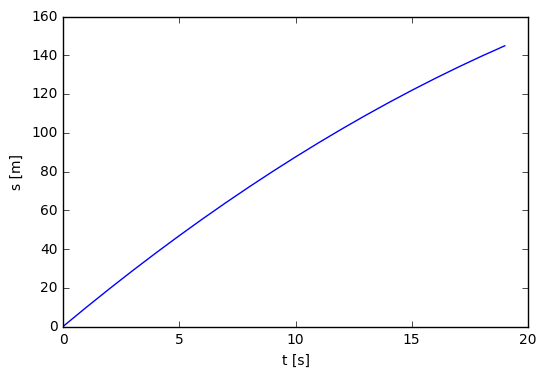

In [8]:
# x-t Diagramm
t = np.arange(t0, t1)
plt.plot(t, s(t,a1,v0,s0))
plt.xlabel('t [s]')
plt.ylabel('s [m]')
plt.show()

### Aufgabe 5
An der Einfahrt einer belebten Autobahn steht ein Wagen A, der in 15s auf 150 km/h beschleunigen kann. Es nähert sich ein Kfz B mit 120 km/h.

a) Wie weit muss B von A noch entfernt sein, damit der Sicherheitsabstand von $s_0$ = 150m nie unterschritten wird?

**Lösung:**

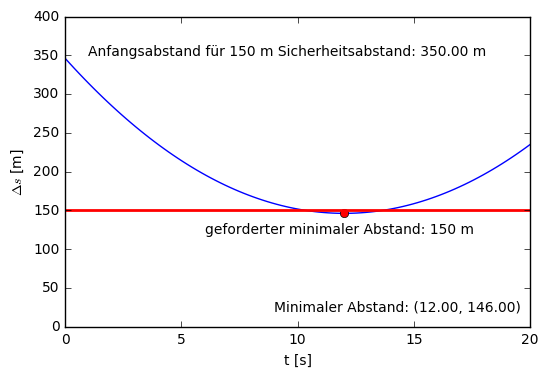

In [17]:
# definiere Größen
v0 = 0 # in m/s
v1 = 150 * 1000/60**2 # in m/s
delta_t = 15 # in s
v_B = 120 * 1000/60**2 # in m/s

# berechne Beschleunigung von Wagen A
a = (v1 - v0)/delta_t # in m/s^(-2)

# berechne Position von A und B zum Zeitpunkt t und dem Anfangsabstand s0 zwischen A und B
def s(t, a0, v0, s0):
    return 0.5 * a0 * (t**2) + v0 * t + s0

def delta_s(t, s0):
    return s(t, a, v0, s0) - s(t, 0, v_B, 0)

# minimaler Abstand zwischen A und B
# leite delta_s ab und setze gleich 0 um Minimum zu finden
def min_delta_s(s0):
    t_min = v_B / a
    return (t_min, delta_s(t_min, s0))

def plot_distance(s0):
    t = np.linspace(0,20,100)
    plt.plot(t, delta_s(t, s0))
    t_min, ds = min_delta_s(s0)
    ds_min = 150. - delta_s(t_min,0)
    plt.text(1, 350, r'Anfangsabstand für 150 m Sicherheitsabstand: {:.2f} m'.format(ds_min))
    plt.plot([t_min], [ds], 'ro')
    plt.text(9, 20, r'Minimaler Abstand: ({:.2f}, {:.2f})'.format(t_min, ds))
    plt.plot([0, 20], [150, 150], 'r-', lw=2)
    plt.text(6, 120, r'geforderter minimaler Abstand: 150 m')
    plt.xlabel('t [s]')
    plt.ylabel(r'$\Delta s$ [m]')
    plt.ylim(0, 400)
    plt.show()
interact(plot_distance, s0=(0, 500, 1.))

b) Wann findet die größte Annäherung statt?

**Lösung:**
Die Frage nach der größten Annäherung entspricht der Frage nach dem kleinsten Abstand.
Diese findet am zuvor bestimmten Minimum von $\Delta s$ statt, zur Zeit $t_{\text{min}} = 12 \,\text{s}$.

### Aufgabe 6
Eine Stahlkugel wird zum Zeitpunkt $t = 0\,\text{s}$ mit der Anfangsgeschwindigkeit $v_0 = 30\,\text{m/s}$ unter einem Winkel von  $\alpha= 60^{\circ}$ gegen die Horizontale geworfen. Vernachlässigen Sie die Luftreibung und verwenden Sie $g = 10\,\text{m/s}^2$.

a) Wie lauten die allgemeinen Ausdrücke für $\vec{r}(t)$, $\vec{v}(t)$ und $\vec{a}(t)$?

**Lösung**: Wir wählen das Koordinatensystem so, dass die z-Achse nach oben zeigt und die x-Achse in Richtung des Wurfs zeigt. Somit reduziert sich die Rechnung auf ein zweidimensionales Problem.

In [10]:
# definiere Größen und Konstanten
g = 10 # in m/s^2
v0 = 30 # in m/s
alpha = 60 * math.pi / 180 # in rad

# definiere kartesisches Koordinatensystem
N = ReferenceFrame('N')

# definiere Variable t
t = symbols('t')

# Ausdruck für a(t)
a0_x = 0
a0_y = 0 
a0_z = - g
a0 = a0_x * N.x + a0_y * N.y + a0_z * N.z

def a(t):
    return a0

# Ausdruck für v(t)
v0_x = v0 * math.cos(alpha) # Merkhilfe, um zu entscheiden ob cos/sin : Winkel von 0 und 90 Grad einsetzen
v0_y = 0 
v0_z = v0 * math.sin(alpha)
v0 = v0_x * N.x + v0_y * N.y + v0_z * N.z

def v(t):
    return a(t) * t + v0

# Ausdruck für r(t)
r0_x = 0
r0_y = 0
r0_z = 0
r0 = r0_x * N.x + r0_y * N.y + r0_z * N.z

def r(t):
    return (0.5 * a0 * t**2 + v0 * t + r0)

print(r'a(t) = {}'.format(a(t)))
print(r'v(t) = {}'.format(v(t)))
print(r'r(t) = {}'.format(r(t)))

a(t) = - 10*N.z
v(t) = 15.0000000000000*N.x + (-10*t + 25.9807621135332)*N.z
r(t) = 15.0*t*N.x + (-5.0*t**2 + 25.9807621135332*t)*N.z


b) An welchem Punkt $P_1$ befindet sich die Kugel zur Zeit $t_1 = 2\,\text{s}$?

**Lösung:**

In [11]:
t1 = 2 # in s
print(r'Position P1 bei t1: {}'.format(r(t1)))

Position P1 bei t1: 30.0000000000000*N.x + 31.9615242270663*N.z


c) Wie groß sind Betrag und Richtung der Geschwindigkeit $\vec{v}_1$ zur Zeit $t_1$?

**Lösung:**

In [12]:
print(r'Geschwindigkeitsvektor bei t1: {}'.format(v(t1)))
print(r'Betrag des Geschwindigkeitsvektors bei t1: {:.3f}'.format(v(t1).magnitude()))
unit_vector = v(t1).normalize()
print(r'Einheitsvektor der Geschwindigkeit bei t1: {}'.format(unit_vector))
beta = math.atan(0.370363447941103/0.928886923381516)*180/math.pi
print(r'Winkel des Geschwindigkeitsvektor bei t1 zur x-Achse: {:.2f}'.format(beta))

Geschwindigkeitsvektor bei t1: 15.0000000000000*N.x + 5.98076211353316*N.z
Betrag des Geschwindigkeitsvektors bei t1: 16.148
Einheitsvektor der Geschwindigkeit bei t1: 0.928886923381516*N.x + 0.370363447941103*N.z
Winkel des Geschwindigkeitsvektor bei t1 zur x-Achse: 21.74


d) Wie groß sind zu diesem Zeitpunkt die Normal- und die Tangentialbeschleunigung?

**Lösung:**

In [13]:
print(r'Normalbeschleunigung: {:.2f}'.format(g * math.cos(beta)))
print(r'Tangentialbeschleunigung: {:.2f}'.format(g * math.sin(beta)))

Normalbeschleunigung: -9.68
Tangentialbeschleunigung: 2.50


e) Zu welchem Zeitpunkt erreicht die Kugel ihre größte Höhe?

**Lösung:**

Am Scheitelpunkt erreicht die Kugel die größte Höhe. Dort gilt, dass die z-Komponente der Geschwindigkeit einen Vorzeichenwechsel vollzieht.

Wir können also direkt ansetzen:
$$ v_z = v_0 \sin \alpha - g t_{z, \text{max}} = 0$$

In [14]:
t_zmax = v0_z / g
print(r't_zmax beträgt {:.2f}s'.format(t_zmax))

t_zmax beträgt 2.60s


### Aufgabe 7
Der Dartpfeil beim Affenschussversuch hat in der Vorlesung das Ziel getroffen, wenn er horizontal losgeschossen wurde, während die Zeilscheibe fallengelassen wird. Sie wollen austesten, ob das auch bei anderen Abschusswinkeln zutrifft und suchen sich kurzerhand einen Affen, der seitlich über Ihnen in einer horizontalen Entfernung $d$ an einem Ast hängt. Diesen Affen wollen sie vom Erdboden aus mit einem Betäubungspfeil treffen und zielen auf ihn. Der Affe betrachtet sie schon argwöhnisch und lässt just in dem Moment den Ast los, in dem sie Ihren Pfeil mit der Geschwindigkeit $v_0$ abschießen.

a) Zeigen Sie, ob der Affe getroffen wird oder nicht.

**Lösung:**

Der Affe wird immer dann getroffen, wenn die x-Komponente der Pfeilgeschwindigkeit groß genug ist, dass der Pfeil den Affen erreicht, bevor der Pfeil auf den Boden auftrifft.
Entscheidend ist hier das [Superpositionsprinzip](https://de.wikipedia.org/wiki/Superposition), das besagt, dass die vertikale Bewegungskomponente unabhängig von der horizontalen betrachtet werden darf.

Auf Affen und Pfeil wirken beide die Schwerebeschleunigung. Daher bewegen sich beide gleich schnell aus der Anfangsposition nach unten. Wir zeigen dies nun mit einer Rechnung:

Ortsvektor des Affen $r_{\text{Affe}}(t) = \begin{pmatrix} d \\ h - g/2 \cdot t^2 \end{pmatrix}$

Ortsvektor des Pfeils $r_{\text{Pfeil}}(t) = \begin{pmatrix} v_0 \cos(\alpha) \cdot t \\ v_0 \sin(\alpha) \cdot t - g/2 \cdot t^2 \end{pmatrix}$,

wobei der Abschusswinkel (bei einem zielsicheren Schützen) $\alpha = \tan^{-1} (h/d)$ ist.

Der Pfeil erreicht den Affen, sobald $v_0 \cos(\alpha) t_{\text{Treffer}} = d$, also bei $t_{\text{Treffer}} = \frac{d}{v_0 \cos(\alpha)}$.

Die Bedingung, dass der Affe getroffen wurde entspricht der Forderung, dass die Pfeilhöhe zu diesem Zeitpunkt einen positiven Wert haben muss.

Dies ist der Fall, wenn

$$v_0 \sin(\alpha) \cdot t_{\text{Treffer}} - g/2 \cdot t_{\text{Treffer}}^2 > 0,$$

also falls 

$$ v_0^2 >  g/2 \cdot \left(\frac{d}{ \sin(\alpha) \cos(\alpha)}\right).$$

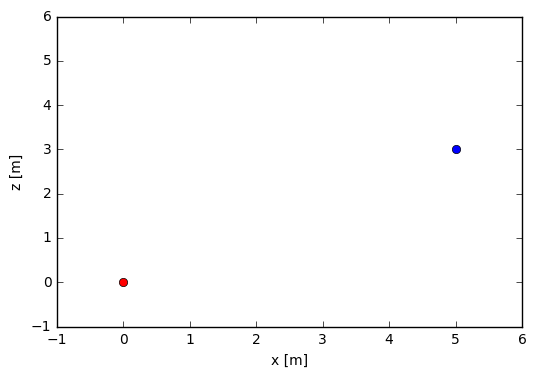

In [15]:
# definiere Schwerebeschleunigung
g = 9.81 # in m/s^2
# definiere Abstand Affe zu Schütze, wähle beispielsweise 5m
d = 5 # in m
# definiere Höhe des Affen relativ zum Gewehr des Schützen, wähle beispielsweise 3m
h = 3 # in m
# definiere Anfangsgeschindigkeit des Geschosses
v0 = 20 # in m/s

# Ortsvektor Affe
def r_affe(t):
    x = d
    z = h -g * t**2
    return (x,z)

# Ortsvektor Pfeil
def r_pfeil(t,v0):
    alpha = math.atan(h/d) # Schusswinkel, mit dem der Schütze auf den Affen zielt
    x = v0 * math.cos(alpha) * t
    z = v0 * math.sin(alpha) * t - g * t**2
    return (x,z)

def plot(t=0, v0=20):
    r_pfeil_x, r_pfeil_z = r_pfeil(t, v0)
    plt.plot(r_pfeil_x, r_pfeil_z, 'ro')
    r_affe_x, r_affe_z = r_affe(t)
    plt.plot(r_affe_x, r_affe_z, 'bo')

    #plt.text(9, 20, r'Minimaler Abstand: ({:.2f}, {:.2f})'.format(t_min, ds))
    plt.xlabel(r'x [m]')
    plt.ylabel(r'z [m]')
    plt.xlim(-1, 6)
    plt.ylim(-1, 6)
    plt.show()
interact(plot, t=(0, 0.6, .01), v0=(5, 25, 1.))

b) Mit welcher Geschwindigkeit bewegt sich der Pfeil relativ zum Affen?

**Lösung:**

Der Pfeil bewegt sich stets relativ zum Affen mit Geschwindigkeit $\vec{v}_0 = \begin{pmatrix} v_0 \cos(\alpha) \\ v_0 \sin(\alpha) \end{pmatrix}$.

Dies kann man leicht einsehen, wenn man sich in das Bezugssystem des Affens setzt, das wie auch der Pfeil der gleichen Schwerebeschleunigung unterliegt.

### Mathematische Ergänzungen
Bestimmen Sie alle Nullstellen des Polynoms
$$z^3+z^2-2$$
und geben Sie die Zerlegung in Linearfaktoren an.

**Lösung:** verwende [Polynomdivision](https://de.wikipedia.org/wiki/Polynomdivision), um die Nullstellen und somit auch die Linearfaktoren zu bestimmen

In [18]:
# definiere Variable und Polynom
z = symbols('z')
f = z**3 + z**2 - 2
print(f)

# schnelle Lösung mit dem Computer
print(factor(f))

# ausführliche Lösung
# rate erste Nullstelle:
z0 = 1
print(f.subs(z,z0))

# Polynomdivision
f_prime = simplify(f / (z-1))
print(f_prime)

# bestimme Nullstellen mit Lösungsformel für Polynome zweiten Grades
def loesungsformel(p,q):
    x1 = -p/2 + sympy.sqrt(p**2/4 -q)
    x2 = -p/2 - sympy.sqrt(p**2/4 -q)
    return x1, x2
z1, z2 = loesungsformel(2,2)

# gebe Nullstellen aus
print(z0)
print(z1)
print(z2)

# Zerlegung in Linearfaktoren
f_factorised = (z - z0) * (z - z1) * (z - z2)
print(f_factorised)

z**3 + z**2 - 2
(z - 1)*(z**2 + 2*z + 2)
0
z**2 + 2*z + 2
1
-1.0 + 1.0*I
-1.0 - 1.0*I
(z - 1)*(z + 1.0 - 1.0*I)*(z + 1.0 + 1.0*I)
